# Model Evaluation and Selection

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures


# 1) Linear Regression

In [226]:
data=pd.read_csv('data_w3_ex1.csv')

In [228]:
x=data.x.values.reshape(-1,1)
y=data.y.values.reshape(-1,1)
print(x.shape,y.shape)

(50, 1) (50, 1)


In [229]:
y

array([[433.],
       [455.],
       [472.],
       [483.],
       [468.],
       [482.],
       [540.],
       [535.],
       [558.],
       [566.],
       [581.],
       [596.],
       [597.],
       [619.],
       [617.],
       [653.],
       [667.],
       [671.],
       [669.],
       [679.],
       [707.],
       [711.],
       [745.],
       [730.],
       [744.],
       [738.],
       [773.],
       [772.],
       [784.],
       [776.],
       [805.],
       [833.],
       [826.],
       [821.],
       [834.],
       [833.],
       [826.],
       [844.],
       [869.],
       [852.],
       [863.],
       [853.],
       [877.],
       [864.],
       [875.],
       [878.],
       [874.],
       [883.],
       [911.],
       [897.]])

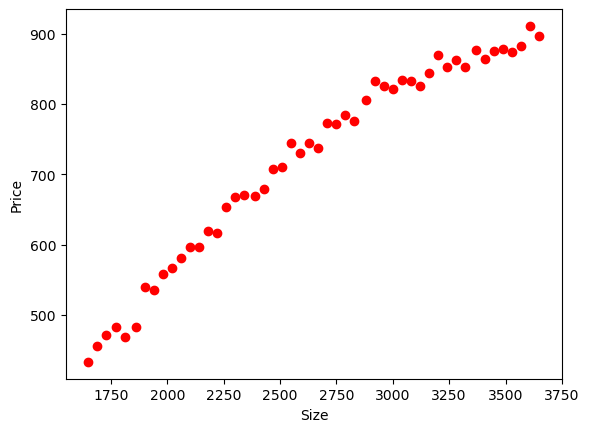

In [230]:
plt.scatter(x,y,c='r')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

## Splitting the data into 3 sets

In [231]:
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.4,random_state=1)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5,random_state=1)


print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)
print('x_cv',x_cv.shape)
print('y_cv',y_cv.shape)

x_train (30, 1)
y_train (30, 1)
x_test (10, 1)
y_test (10, 1)
x_cv (10, 1)
y_cv (10, 1)


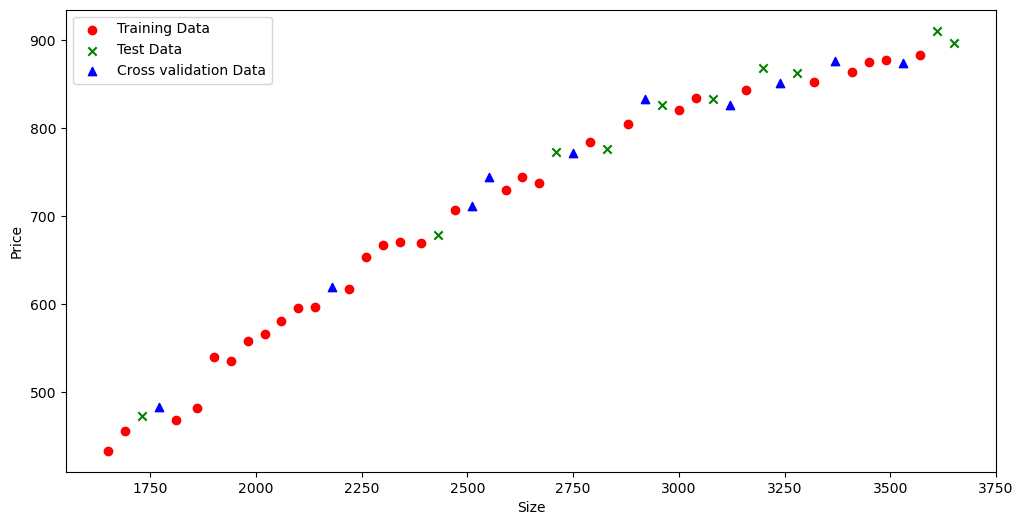

In [232]:
fig,ax=plt.subplots(1,1,figsize=(12,6))
ax.scatter(x_train,y_train,marker='o',c='r',label='Training Data')
ax.scatter(x_test,y_test,marker='x',c='g',label='Test Data')
ax.scatter(x_cv,y_cv,marker='^',c='b',label='Cross validation Data')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()
plt.show()

## Z-score Normalization

In [233]:
z_score=StandardScaler()
x_train_norm=z_score.fit_transform(x_train)


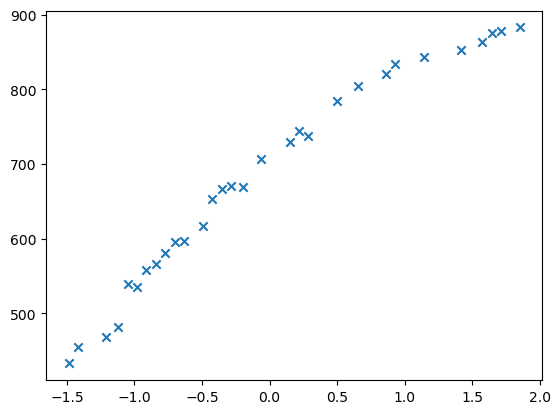

In [234]:
plt.scatter(x_train_norm,y_train,marker='x')

## Training model using simple linear regression

In [235]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()
linear_regression.fit(x_train_norm,y_train)
y_pred=linear_regression.predict(x_train_norm)

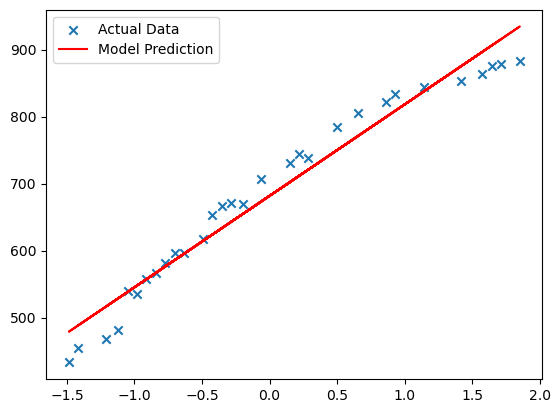

In [236]:
plt.scatter(x_train_norm,y_train,marker='x',label='Actual Data')
plt.plot(x_train_norm,y_pred,c='r',label='Model Prediction')
plt.legend()
plt.show()

## Model Evaluation
- We can do model evaluation by calculating 3 types of error
>- Training Error
$$J_{train}(\vec{w}, b) = \frac{1}{2m_{train}}\left[\sum_{i=1}^{m_{train}}(f_{\vec{w},b}(\vec{x}_{}^{(i)}) - y_{}^{(i)})^2\right]$$
>- Test Error
$$J_{test}(\vec{w}, b) = \frac{1}{2m_{test}}\left[\sum_{i=1}^{m_{test}}(f_{\vec{w},b}(\vec{x}_{test}^{(i)}) - y_{test}^{(i)})^2\right]$$
>- Cross Validation Error
$$J_{cv}(\vec{w}, b) = \frac{1}{2m_{cv}}\left[\sum_{i=1}^{m_{cv}}(f_{\vec{w},b}(\vec{x}_{cv}^{(i)}) - y_{cv}^{(i)})^2\right]$$




The training set and cross-validation set are used to make decisions about model-fitting parameters and architecture, like the neural network and degree of polynomial. But when it comes to evaluating the final performance and choosing a learning algorithm, a separate test set is typically used.

In [237]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,y_pred)/2


408.05268746592697

In [238]:
x_cv_norm=z_score.transform(x_cv)
y_pred=linear_regression.predict(x_cv_norm)

mean_squared_error(y_cv,y_pred)/2

544.0374247948732

In [239]:
x_train

array([[3320.],
       [2340.],
       [3490.],
       [2630.],
       [2590.],
       [1810.],
       [3000.],
       [2220.],
       [2880.],
       [2060.],
       [2790.],
       [3450.],
       [3040.],
       [2390.],
       [2470.],
       [2670.],
       [1900.],
       [1940.],
       [3570.],
       [1690.],
       [2300.],
       [1650.],
       [2260.],
       [1860.],
       [2100.],
       [2020.],
       [1980.],
       [2140.],
       [3410.],
       [3160.]])

## Polynomial Feature

In [240]:
cv_mses=[]
train_mses=[]
scaler=[]
models=[]
train_predict=[]
cv_predict=[]


for degree in range(1,11):
    poly=PolynomialFeatures(degree,include_bias=False)
    x_train_poly=poly.fit_transform(x_train)
    
    scaler_poly=StandardScaler()
    x_train_poly_scaler=scaler_poly.fit_transform(x_train_poly)
    scaler.append(scaler_poly)

    
    
    model=LinearRegression()
    model.fit(x_train_poly_scaler,y_train)
    models.append(model)
    
    y_pred_train=model.predict(x_train_poly_scaler)
    train_mse=mean_squared_error(y_train,y_pred_train)/2
    train_mses.append(train_mse)
    train_predict.append(y_pred_train)
    
    poly=PolynomialFeatures(degree,include_bias=False)
    x_cv_poly=poly.fit_transform(x_cv)
    x_cv_poly_scaler=scaler_poly.transform(x_cv_poly)
    
    y_pred_cv=model.predict(x_cv_poly_scaler)
    cv_mse=mean_squared_error(y_cv,y_pred_cv)/2
    cv_mses.append(cv_mse)
    cv_predict.append(y_pred_cv)

    

In [241]:
min_cv=min(cv_mses)
index=cv_mses.index(min_cv)
print(f"The lowest CV MSE is found on degree = {index+1} with a minimum value of {min_cv}")


The lowest CV MSE is found on degree = 4 with a minimum value of 75.65476240002899


In [242]:
degree=4
poly=PolynomialFeatures(degree,include_bias=False)
x_test_poly=poly.fit_transform(x_test)
x_test_poly_scaled=scaler[degree-1].transform(x_test_poly)
y_pred_test=models[degree-1].predict(x_test_poly_scaled)
x_test_mse=mean_squared_error(y_test,y_pred_test)/2

In [243]:
print('Training MSE',train_mses[3])
print('Cross Validation MSE',cv_mses[3])
print('Test MSE',x_test_mse)

Training MSE 47.01792450168773
Cross Validation MSE 75.65476240002899
Test MSE 104.14260312304035


# 2) Neural Network

In [244]:
degree=1
poly=PolynomialFeatures(degree,include_bias=False)
X_train_poly=poly.fit_transform(x_train)
X_cv_poly=poly.transform(x_cv)
X_test_poly=poly.transform(x_test)

In [245]:
X_test_poly

array([[3200.],
       [3650.],
       [3610.],
       [2960.],
       [3280.],
       [2430.],
       [1730.],
       [2710.],
       [2830.],
       [3080.]])

In [246]:
norm=StandardScaler()
X_train_poly_norm=norm.fit_transform(X_train_poly)
X_cv_poly_norm=norm.transform(X_cv_poly)
X_test_poly_norm=norm.transform(X_test_poly)

In [247]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import MeanSquaredError


def neural_network_function():
    tf.random.set_seed(20)# Random state
    model_1=Sequential([
        Dense(units=25,activation='relu'),
        Dense(units=15,activation='relu'),
        Dense(units=1,activation='linear')


    ],name='model_1')
    
    model_2=Sequential([
        Dense(units=20,activation='relu'),
        Dense(units=12,activation='relu'),
        Dense(units=12,activation='relu'),
        Dense(units=20,activation='relu'),


        Dense(units=1,activation='linear')
        
        
    ],name='model_2')
    
    model_3=Sequential([
        Dense(units=32,activation='relu'),
        Dense(units=16,activation='relu'),
        Dense(units=8,activation='relu'),
        Dense(units=4,activation='relu'),
        Dense(units=12,activation='relu'),



        Dense(units=1,activation='linear')
    ],name='model_3')
    
    model_list=[model_1,model_2,model_3]
                     
    return model_list

model_list=neural_network_function()

In [248]:
neural_cv_mses=[]
neural_train_mses=[]
for i in model_list:
    i.compile(loss='mse',optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
    

    i.fit(X_train_poly_norm,y_train,epochs=300,verbose=0)
    y_pred_train=i.predict(X_train_poly_norm)
    train_mse=mean_squared_error(y_train, y_pred_train) / 2
    neural_train_mses.append(train_mse)
    
    y_pred_cv=i.predict(X_cv_poly_norm)
    cv_mse=mean_squared_error(y_cv, y_pred_cv) / 2
    neural_cv_mses.append(cv_mse)
    
    

1/1 [==============================] - 0s 24ms/step


In [258]:
cv_min=min(neural_cv_mses)
cv_index=neural_cv_mses.index(cv_min)

train_min=min(neural_train_mses)
train_index=neural_train_mses.index(train_min)
print(cv_index,train_index)

2 2


#### We will choose 3rd model for this model

In [260]:
model_num=3
y_prediction=model_list[model_num-1].predict(X_test_poly_norm)
test_mse=mean_squared_error(y_test,y_prediction)/2

1/1 [==============================] - 0s 15ms/step


In [263]:
print(f'''
Selected Model: {cv_index+1}
Training MSE: {train_min}
Cross Validation MSE: {cv_min}
Test MSE: {test_mse}


''')


Selected Model: 3
Training MSE: 41.997147868030396
Cross Validation MSE: 70.66643939227797
Test MSE: 92.9847363831941





# 3) Classification


In [316]:
dataset=pd.read_csv('data_w3_ex2.csv')

In [317]:
dataset

,1,2,3
0,1000.0,1460.0,0.0
1,1050.0,1010.0,0.0
2,1090.0,854.0,0.0
3,1140.0,2560.0,0.0
4,1180.0,4620.0,0.0
...,...,...,...
195,9820.0,3340.0,1.0
196,9860.0,3440.0,1.0
197,9910.0,1810.0,1.0
198,9950.0,3520.0,1.0


In [318]:
x= dataset.iloc[:, [0, 1]].values
y=dataset.iloc[:,[2]].values


In [319]:
x.shape

(200, 2)

In [320]:
x_train,x_,y_train,y_=train_test_split(x,y,test_size=0.4,random_state=1)
x_cv,x_test,y_cv,y_test=train_test_split(x_,y_,test_size=0.5,random_state=1)
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_test',x_test.shape)
print('y_test',y_test.shape)
print('x_cv',x_cv.shape)
print('y_cv',y_cv.shape)

x_train (120, 2)
y_train (120, 1)
x_test (40, 2)
y_test (40, 1)
x_cv (40, 2)
y_cv (40, 1)
